In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import yfinance as yf
from pandas_datareader import data as pdr
import datetime as dt

sns.set( rc={'figure.figsize':(16,9)} )

# Choose stocks and market

In [63]:
chosen_ones = [
                'Titan', 'ASIANPAINT',      # Consumer Durables
                'HINDUNILVR', 'ITC',        # FMCG
                'APOLLOHOSP',               # Healthcare
                'HDFCBANK', 'HDFC'          # Financial Services
            ]

index_one = '^NSEI'                         # NIFTY 50

# Download data

In [64]:
history = {}

yf.pdr_override( )
history[index_one] = pdr.get_data_yahoo( index_one, period='3y' ).reset_index( )

good_dates = set( history[index_one]['Date'] )

history[index_one].shape

[*********************100%***********************]  1 of 1 completed


(745, 7)

In [65]:
for ticker in chosen_ones:
    history[ticker] = pdr.get_data_yahoo( ticker + '.NS', period='3y' ).reset_index( )
    print( ticker + ': ' + str( history[ticker].shape ) )

    good_dates = good_dates.intersection( set( history[ticker]['Date'] ) )

[*********************100%***********************]  1 of 1 completed
Titan: (747, 7)
[*********************100%***********************]  1 of 1 completed
ASIANPAINT: (747, 7)
[*********************100%***********************]  1 of 1 completed
HINDUNILVR: (747, 7)
[*********************100%***********************]  1 of 1 completed
ITC: (747, 7)
[*********************100%***********************]  1 of 1 completed
APOLLOHOSP: (747, 7)
[*********************100%***********************]  1 of 1 completed
HDFCBANK: (747, 7)
[*********************100%***********************]  1 of 1 completed
HDFC: (747, 7)


# Get rid of dates with missing data

In [66]:
for key in history.keys( ):
    history[key] = history[key][ history[key]['Date'].isin( good_dates ) ].reset_index( drop=True )
    print( key + ': ' + str( history[key].shape ) )

^NSEI: (745, 7)
Titan: (745, 7)
ASIANPAINT: (745, 7)
HINDUNILVR: (745, 7)
ITC: (745, 7)
APOLLOHOSP: (745, 7)
HDFCBANK: (745, 7)
HDFC: (745, 7)


# Calculate Daily Return

In [67]:
for key in history.keys( ):
    history[key]['Return'] = ( history[key]['Close'] - history[key]['Open'] ) / history[key]['Open']

# Train test split

In [68]:
split_date = history[index_one]['Date'].max( ) - dt.timedelta( days=180 )
split_date

Timestamp('2022-04-10 00:00:00+0530', tz='Asia/Kolkata')

In [69]:
test_history = {}
train_history = {}

for key in history.keys( ):
    train_history[key] = history[key][ history[key]['Date'] < split_date ].copy( )
    test_history[key] = history[key][ history[key]['Date'] >= split_date ].copy( )

# Calculate Expected Return and Standard Deviation

In [70]:
train_exp_return = {}
train_std_return = {}

for key in train_history.keys( ):
    train_exp_return[key] = train_history[key]['Return'].mean( )
    train_std_return[key] = train_history[key]['Return'].std( )

In [71]:
test_exp_return = {}
test_std_return = {}

for key in test_history.keys( ):
    test_exp_return[key] = test_history[key]['Return'].mean( )
    test_std_return[key] = test_history[key]['Return'].std( )

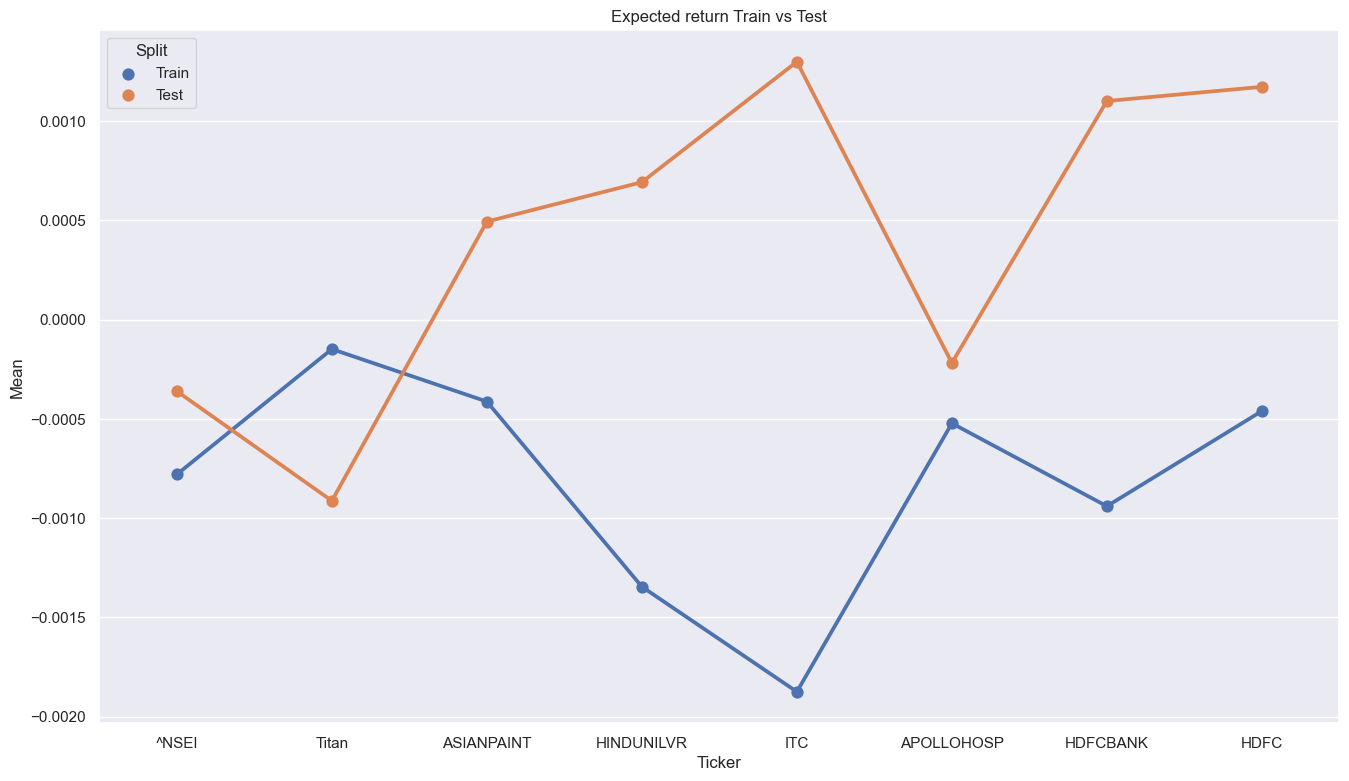

In [72]:
exp_return_graph = pd.concat( [
pd.DataFrame( list( zip( ['Train'] * len( train_exp_return.keys( ) ), train_exp_return.keys( ), train_exp_return.values( ) ) ), columns=['Split', 'Ticker', 'Mean'] ),
pd.DataFrame( list( zip( ['Test'] * len( test_exp_return.keys( ) ), test_exp_return.keys( ), test_exp_return.values( ) ) ), columns=['Split', 'Ticker', 'Mean'] )
] )

fig = sns.pointplot( data=exp_return_graph, x='Ticker', y='Mean', hue='Split' )
plt.title( 'Expected return Train vs Test' )
plt.show( )

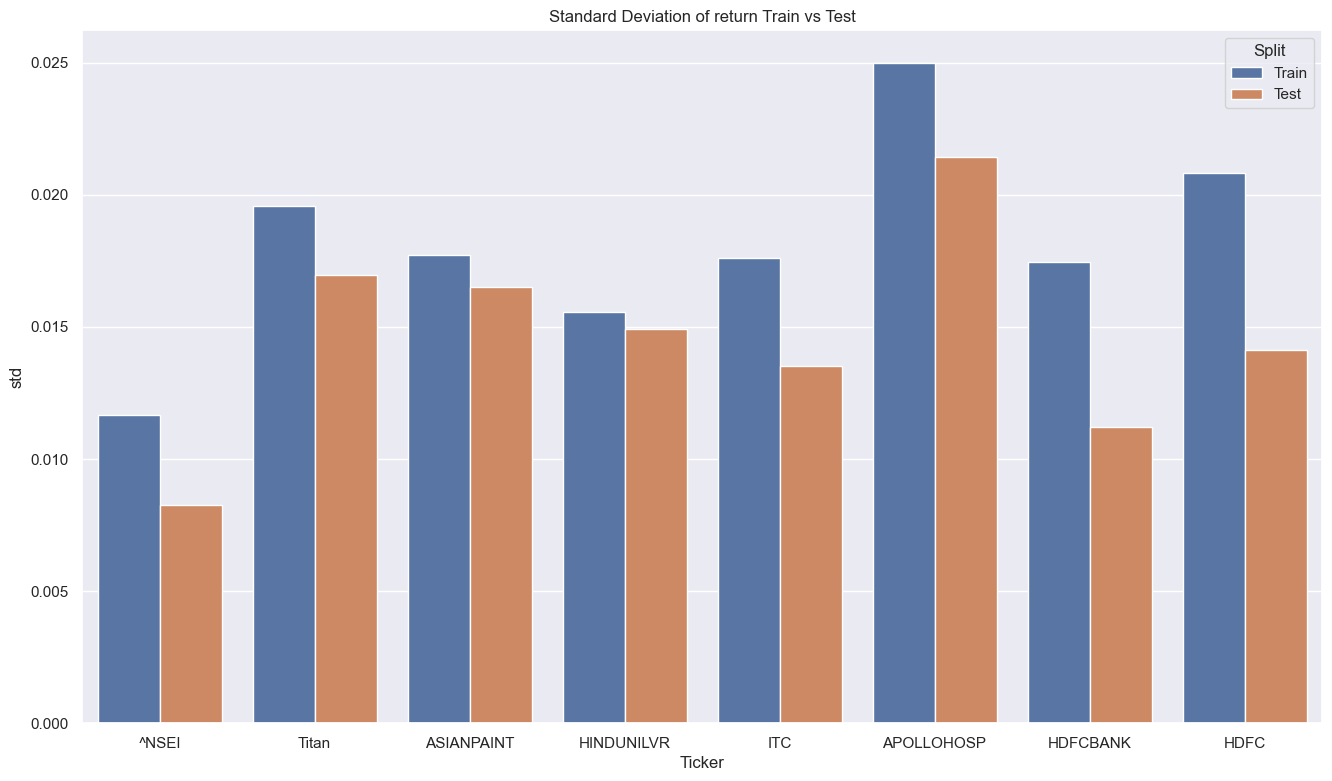

In [89]:
std_return_graph = pd.concat( [
pd.DataFrame( list( zip( ['Train'] * len( train_std_return.keys( ) ), train_std_return.keys( ), train_std_return.values( ) ) ), columns=['Split', 'Ticker', 'std'] ),
pd.DataFrame( list( zip( ['Test'] * len( test_std_return.keys( ) ), test_std_return.keys( ), test_std_return.values( ) ) ), columns=['Split', 'Ticker', 'std'] )
] )

# fig = sns.pointplot( data=std_return_graph, x='Ticker', y='std', hue='Split' )
sns.barplot( data=std_return_graph, x='Ticker', y='std', hue='Split' )
plt.title( 'Standard Deviation of return Train vs Test' )
plt.show( )

# Calculate correlation coefficient for each stock with market

In [82]:
corr_coeff = {}

for stock in chosen_ones:
    corr_coeff[stock] = np.corrcoef( train_history[stock]['Return'], train_history[index_one]['Return'] )[0,1]

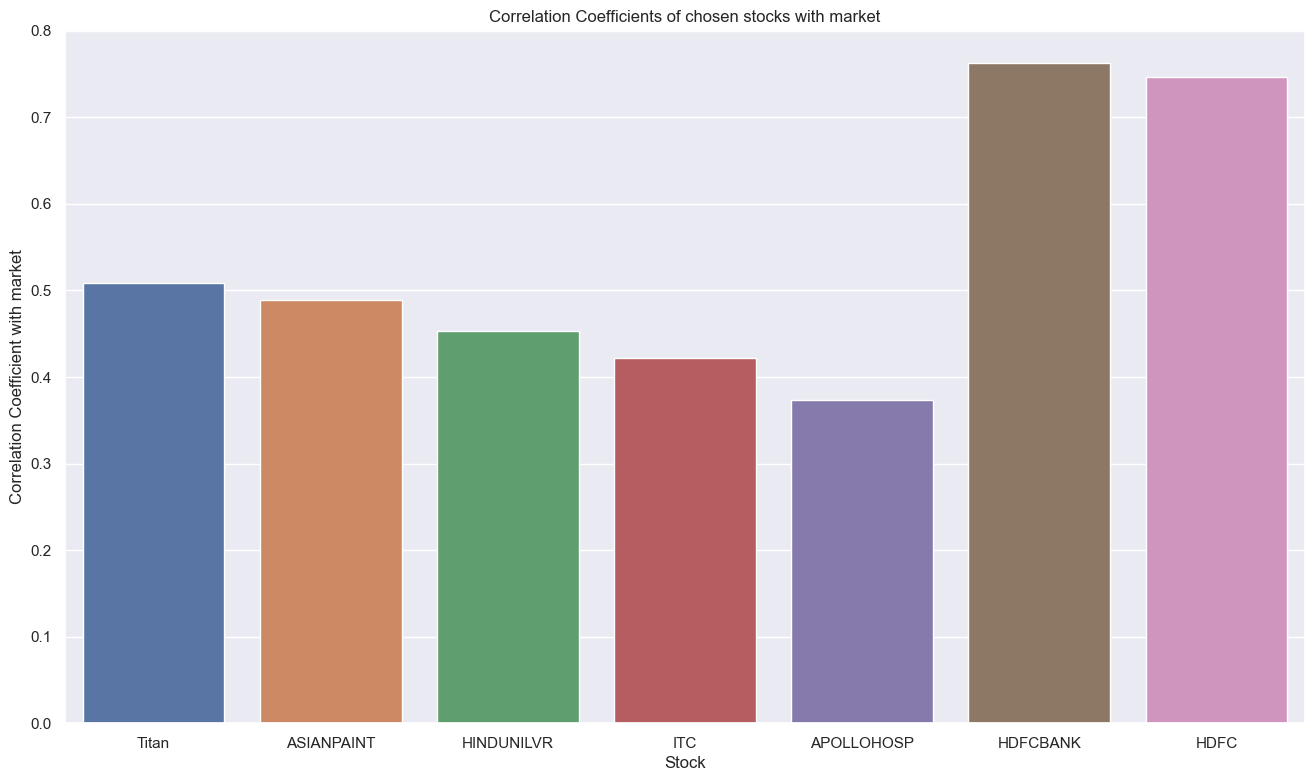

In [90]:
sns.barplot( x=list( corr_coeff.keys( ) ), y=list( corr_coeff.values( ) ) )
plt.xlabel( 'Stock' )
plt.ylabel( 'Correlation Coefficient with market' )
plt.title( 'Correlation Coefficients of chosen stocks with market' )
plt.show( )